In [6]:
#import the stuff
import pandas as pd #dataframes etc
import matplotlib.pyplot as plt #plotting
import pickle
import numpy as np
import os, sys
import seaborn as sns
#training_summary = np.load("/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_5M/No_semi/constlr1e04_trueE/summaries.npz")
#training_summary1 = np.load("/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_5M/No_semi/constlr1e04_trueE/summaries_12.npz")
#training_summary2 = np.load("/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_5M/No_semi/constlr1e04_trueE/summaries_18.npz")
#training_summary3 = np.load("/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_5M/No_semi/constlr1e04_trueE/summaries_24.npz")
#training_summary4 = np.load("/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_5M/No_semi/constlr1e04_trueE/summaries_40.npz")

import ROOT
%jsroot on

#training_summary2 = np.load("/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/52_Onwards/summaries.npz")


Welcome to JupyROOT 6.22/06


In [7]:
import pickle
import numpy as np

folder = "fullHGCAL_fixwt_trimAhcal_relwtUpd_semiparam_mina_1_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_nsm_new_cp2_rmBadEve"

pred_v2 ="/eos/user/n/nkasarag/gnn_results/%s/pred_tb.pickle"%folder
with open(pred_v2, "rb") as f:
    preds_trueEn = np.array(pickle.load(f))
#preds_trueEn = np.exp(-preds_trueEn)
preds_trueEn = (preds_trueEn<3)*preds_trueEn + (preds_trueEn>3)*3


#preds_trueEn = np.load(pred_v2)
#rawE = np.load("/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_msi_10M/rawE.npy")
rawE = np.load("/eos/user/n/nkasarag/gnn_results/fullHGCAL_fixwt_trimAhcal_relwtUpd_semiparam_mina_1_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_nsm/rawE_fullHGCAL.npy")



preds_trueEn = preds_trueEn*rawE

#predPickle = open(pred_v2, "rb")
#print(predPickle)
#preds_trueEn = np.asarray(pickle.load(predPickle))
#print(preds[0])

350.13898
630.19587630761
9.789777
1.0052377942235453
2897981
2897981


(array([[2.89001e+05, 1.71850e+05, 1.47300e+03, 7.30000e+02, 6.03000e+02,
         4.02000e+02, 3.62000e+02, 3.13000e+02, 2.86000e+02, 2.53000e+02],
        [0.00000e+00, 1.17150e+05, 2.87321e+05, 1.30238e+05, 2.68700e+03,
         7.46000e+02, 4.03000e+02, 2.95000e+02, 4.14000e+02, 2.67000e+02],
        [0.00000e+00, 0.00000e+00, 2.06000e+02, 1.57961e+05, 2.81552e+05,
         9.25700e+04, 2.65400e+03, 9.79000e+02, 9.46000e+02, 5.54000e+02],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 6.80000e+01, 3.87900e+03,
         1.95080e+05, 2.70938e+05, 6.27250e+04, 3.61500e+03, 1.49600e+03],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00, 2.93000e+02,
         3.00000e+01, 1.45360e+04, 2.24553e+05, 2.49955e+05, 4.57060e+04],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.06000e+02,
         0.00000e+00, 4.00000e+00, 1.13000e+02, 3.28760e+04, 2.48423e+05],
        [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.40000e+01,
         0.00000e+00, 0.00000e+0

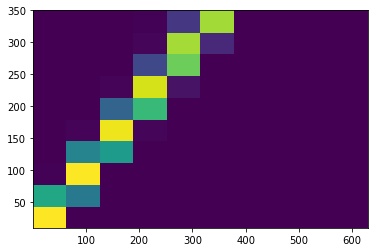

In [8]:
import awkward
trueEn= "/eos/user/n/nkasarag/gnn_results/fullHGCAL_fixwt_trimAhcal_relwtUpd_semiparam_mina_1_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_nsm/trueE_fullHGCAL.npy"
trueEn_pkl = np.load(trueEn)
#trueEnPickle = open(trueEn,"rb")
#trueEn_pkl = np.asarray(pickle.load(trueEnPickle))
#fig, ax = plt.subplots(figsize=(15,10))
#ax.hist(preds_trueEn, bins =1000)
#ax.set_xlabel('Predicted Energy')
#fig.show()
#print(trueEn_pkl[0])
print(np.max(trueEn_pkl))
print(np.max(preds_trueEn))
print(np.min(trueEn_pkl))
print(np.min(preds_trueEn))
print(len(preds_trueEn))
print(len(trueEn_pkl))
plt.hist2d(preds_trueEn, trueEn_pkl)

In [9]:
c=ROOT.TCanvas()
bins=100
xmin=0
xmax=360
#c.SetGrid()
H_pion = ROOT.TH2F("H_pion",";Beam Energy (GeV);#n_{R}", 100,xmin,xmax, 100,0,360)

val = trueEn_pkl
val2 = rawE

for i in range(val.size):
        H_pion.Fill(val[i], val2[i])
        
H_pion.Draw("COLZ")

#ROOT.gPad.SetLogy()
c.Draw()

In [7]:
valid_idx_file="/eos/user/n/nkasarag/gnn_results/fullHGCAL_fixwt_trimAhcal_relwtUpd_semiparam_mina_1_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_nsm/full_HGCAL_rm_badEve_valididx.pickle"
train_idx_file="/eos/user/n/nkasarag/gnn_results/fullHGCAL_fixwt_trimAhcal_relwtUpd_semiparam_mina_1_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_nsm/full_HGCAL_rm_badEve_trainidx.pickle"

#valid_idx_file="/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_msi_10M/all_valididx.pickle"
#train_idx_file="/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_msi_10M/all_trainidx.pickle"

#valid_idx = np.load(valid_idx_file)
#train_idx = np.load(train_idx_file)

valid_idx_f = open(valid_idx_file,"rb")
valid_idx = np.asarray(pickle.load(valid_idx_f))
print(len(valid_idx))

train_idx_f = open(train_idx_file,"rb")
train_idx = np.asarray(pickle.load(train_idx_f))
print(len(train_idx))
print(preds_trueEn[train_idx[1]])
print(trueEn_pkl[train_idx[1]])
print(preds_trueEn[valid_idx[1]])
print(trueEn_pkl[valid_idx[1]])
valid_trueEn_All=[]
valid_predEn_All=[]
##temp lists
valid_trueEn_20=[]
valid_predEn_20=[]
valid_trueEn_50=[]
valid_predEn_50=[]
valid_trueEn_80=[]
valid_predEn_80=[]
valid_trueEn_100=[]
valid_predEn_100=[]
valid_trueEn_120=[]
valid_predEn_120=[]
valid_trueEn_200=[]
valid_predEn_200=[]
valid_trueEn_250=[]
valid_predEn_250=[]
valid_trueEn_300=[]
valid_predEn_300=[]

train_trueEn_All=[]
train_predEn_All=[]
for i in range(len(valid_idx)):
    valid_trueEn=(trueEn_pkl[valid_idx[i]])
    valid_predEn=(preds_trueEn[valid_idx[i]])
    if(valid_trueEn>=18 and valid_trueEn<=22):
        valid_trueEn_20.append(valid_trueEn)
        valid_predEn_20.append(valid_predEn)
    elif(valid_trueEn>=48 and valid_trueEn<=52):
        valid_trueEn_50.append(valid_trueEn)
        valid_predEn_50.append(valid_predEn)
    elif(valid_trueEn>=78 and valid_trueEn<=82):
        valid_trueEn_80.append(valid_trueEn)
        valid_predEn_80.append(valid_predEn)
    elif(valid_trueEn>=98 and valid_trueEn<=102):
        valid_trueEn_100.append(valid_trueEn)
        valid_predEn_100.append(valid_predEn)
    elif(valid_trueEn>=118 and valid_trueEn<=122):
        valid_trueEn_120.append(valid_trueEn)
        valid_predEn_120.append(valid_predEn)
    elif(valid_trueEn>=198 and valid_trueEn<=202):
        valid_trueEn_200.append(valid_trueEn)
        valid_predEn_200.append(valid_predEn)
    elif(valid_trueEn>=248 and valid_trueEn<=252):
        valid_trueEn_250.append(valid_trueEn)
        valid_predEn_250.append(valid_predEn)
    elif(valid_trueEn>=298 and valid_trueEn<=302):
        valid_trueEn_300.append(valid_trueEn)
        valid_predEn_300.append(valid_predEn)
valid_trueEn_All.append(valid_trueEn_20)
valid_trueEn_All.append(valid_trueEn_50)
valid_trueEn_All.append(valid_trueEn_80)
valid_trueEn_All.append(valid_trueEn_100)
valid_trueEn_All.append(valid_trueEn_120)
valid_trueEn_All.append(valid_trueEn_200)
valid_trueEn_All.append(valid_trueEn_250)
valid_trueEn_All.append(valid_trueEn_300)

valid_predEn_All.append(valid_predEn_20)
valid_predEn_All.append(valid_predEn_50)
valid_predEn_All.append(valid_predEn_80)
valid_predEn_All.append(valid_predEn_100)
valid_predEn_All.append(valid_predEn_120)
valid_predEn_All.append(valid_predEn_200)
valid_predEn_All.append(valid_predEn_250)
valid_predEn_All.append(valid_predEn_300)
  
train_trueEn_20=[]
train_predEn_20=[]
train_trueEn_50=[]
train_predEn_50=[]
train_trueEn_80=[]
train_predEn_80=[]
train_trueEn_100=[]
train_predEn_100=[]
train_trueEn_120=[]
train_predEn_120=[]
train_trueEn_200=[]
train_predEn_200=[]
train_trueEn_250=[]
train_predEn_250=[]
train_trueEn_300=[]
train_predEn_300=[]

for i in range(len(train_idx)):
    train_trueEn=(trueEn_pkl[train_idx[i]])
    train_predEn=(preds_trueEn[train_idx[i]])
    if(train_trueEn>=18 and train_trueEn<=22):
        train_trueEn_20.append(train_trueEn)
        train_predEn_20.append(train_predEn)
    elif(train_trueEn>=48 and train_trueEn<=52):
        train_trueEn_50.append(train_trueEn)
        train_predEn_50.append(train_predEn)
    elif(train_trueEn>=78 and train_trueEn<=82):
        train_trueEn_80.append(train_trueEn)
        train_predEn_80.append(train_predEn)
    elif(train_trueEn>=98 and train_trueEn<=102):
        train_trueEn_100.append(train_trueEn)
        train_predEn_100.append(train_predEn)
    elif(train_trueEn>=118 and train_trueEn<=122):
        train_trueEn_120.append(train_trueEn)
        train_predEn_120.append(train_predEn)
    elif(train_trueEn>=198 and train_trueEn<=202):
        train_trueEn_200.append(train_trueEn)
        train_predEn_200.append(train_predEn)
    elif(train_trueEn>=248 and train_trueEn<=252):
        train_trueEn_250.append(train_trueEn)
        train_predEn_250.append(train_predEn)
    elif(train_trueEn>=298 and train_trueEn<=302):
        train_trueEn_300.append(train_trueEn)
        train_predEn_300.append(train_predEn)
train_trueEn_All.append(train_trueEn_20)
train_trueEn_All.append(train_trueEn_50)
train_trueEn_All.append(train_trueEn_80)
train_trueEn_All.append(train_trueEn_100)
train_trueEn_All.append(train_trueEn_120)
train_trueEn_All.append(train_trueEn_200)
train_trueEn_All.append(train_trueEn_250)
train_trueEn_All.append(train_trueEn_300)

train_predEn_All.append(train_predEn_20)
train_predEn_All.append(train_predEn_50)
train_predEn_All.append(train_predEn_80)
train_predEn_All.append(train_predEn_100)
train_predEn_All.append(train_predEn_120)
train_predEn_All.append(train_predEn_200)
train_predEn_All.append(train_predEn_250)
train_predEn_All.append(train_predEn_300)
    
    
np_valid_trueEn=np.array(valid_trueEn_All)
np_valid_predEn=np.array(valid_predEn_All)
np_train_trueEn=np.array(train_trueEn_All)
np_train_predEn=np.array(train_predEn_All)

569399
2277493
159.54365990363573
146.13889
39.96608239860867
38.138092


In [8]:
## reading tb data files
#tb_valid_idx_file="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/TB_data/all_valididx.pickle"
#tb_train_idx_file="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/TB_data/all_trainidx.pickle"
tb_pred_v2 ="/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_ratio_maxlr6e-4_lrSchCyclic_2agg_lay_msi_loss2_05/pred.pickle"


with open(tb_pred_v2, "rb") as f:
    preds_trueEn_tb = np.array(pickle.load(f))
#preds_trueEn_tb = np.exp(-preds_trueEn_tb)
#preds_trueEn_tb = (preds_trueEn_tb<3)*preds_trueEn_tb + (preds_trueEn_tb>3)*3
#preds_trueEn_tb = np.load("/eos/user/n/nkasarag/gnn_results/cp_full_lr0001_Ratio_default_rechGeV_fix_wt_ahcalTrim/pred_cut_tb_upscaled.npy")

tb_raw = np.load("/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_ratio_maxlr6e-4_lrSchCyclic_2agg_lay/rawE_up_TB_all_new.npy")
#tb_predPickle = open(tb_pred_v2, "rb")
#print(tb_predPickle)
tb_preds_trueEn = preds_trueEn_tb#*tb_raw

tb_trueEn= "/eos/user/n/nkasarag/gnn_results/cp_full_lr0006_lrShCyclic_Ratio_default_rechGeV_fix_wt_ahcalTrim_semiparam/cp5/trueE_tb.npy"
#tb_trueEnPickle = open(tb_trueEn,"rb")
tb_trueEn_pkl = np.load(tb_trueEn)
print(tb_trueEn_pkl[200000])

80.0


In [9]:
tb_trueEn_All=[]
tb_predEn_All=[]
##temp lists
tb_trueEn_20=[]
tb_predEn_20=[]
tb_trueEn_50=[]
tb_predEn_50=[]
tb_trueEn_80=[]
tb_predEn_80=[]
tb_trueEn_100=[]
tb_predEn_100=[]
tb_trueEn_120=[]
tb_predEn_120=[]
tb_trueEn_200=[]
tb_predEn_200=[]
tb_trueEn_250=[]
tb_predEn_250=[]
tb_trueEn_300=[]
tb_predEn_300=[]

for i in range(len(tb_trueEn_pkl)):
    tb_trueEn=(tb_trueEn_pkl[i])
    tb_predEn=(tb_preds_trueEn[i])
    if(tb_trueEn==20):
        tb_trueEn_20.append(tb_trueEn)
        tb_predEn_20.append(tb_predEn)
        #print(tb_trueEn)
    elif(tb_trueEn==50):
        tb_trueEn_50.append(tb_trueEn)
        tb_predEn_50.append(tb_predEn)
    elif(tb_trueEn==80):
        tb_trueEn_80.append(tb_trueEn)
        tb_predEn_80.append(tb_predEn)
    elif(tb_trueEn==100):
        tb_trueEn_100.append(tb_trueEn)
        tb_predEn_100.append(tb_predEn)
    elif(tb_trueEn==120):
        tb_trueEn_120.append(tb_trueEn)
        tb_predEn_120.append(tb_predEn)
    elif(tb_trueEn==200):
        tb_trueEn_200.append(tb_trueEn)
        tb_predEn_200.append(tb_predEn)
    elif(tb_trueEn==250):
        tb_trueEn_250.append(tb_trueEn)
        tb_predEn_250.append(tb_predEn)
    elif(tb_trueEn==300):
        tb_trueEn_300.append(tb_trueEn)
        tb_predEn_300.append(tb_predEn)

print(len(tb_predEn_20))
tb_trueEn_All.append(tb_trueEn_20)
tb_trueEn_All.append(tb_trueEn_50)
tb_trueEn_All.append(tb_trueEn_80)
tb_trueEn_All.append(tb_trueEn_100)
tb_trueEn_All.append(tb_trueEn_120)
tb_trueEn_All.append(tb_trueEn_200)
tb_trueEn_All.append(tb_trueEn_250)
tb_trueEn_All.append(tb_trueEn_300)

tb_predEn_All.append(tb_predEn_20)
tb_predEn_All.append(tb_predEn_50)
tb_predEn_All.append(tb_predEn_80)
tb_predEn_All.append(tb_predEn_100)
tb_predEn_All.append(tb_predEn_120)
tb_predEn_All.append(tb_predEn_200)
tb_predEn_All.append(tb_predEn_250)
tb_predEn_All.append(tb_predEn_300)



53164


In [10]:
import ROOT
fout= ROOT.TFile("%s_8dataPoints.root"%folder, 'RECREATE')


Welcome to JupyROOT 6.22/06


In [11]:
import ROOT
hist_pred_Valid=[]
hist_true_Valid=[]
hist_pred_Train=[]
hist_true_Train=[]
hist_predTrue_Valid=[]
hist_norm_predTrue_Valid=[]
hist_predTrue_Train=[]
hist_norm_predTrue_Train=[]
hist_pred_Tbdata=[]
hist_true_Tbdata=[]
hist_predTrue_Tbdata=[]
hist_norm_predTrue_Tbdata=[]

"""hist_pred_QGSP=[]
hist_true_QGSP=[]
hist_pred_FTFP=[]
hist_true_FTFP=[]
hist_predTrue_QGSP=[]
hist_norm_predTrue_QGSP=[]
hist_predTrue_FTFP=[]
hist_norm_predTrue_FTFP=[]"""
hist_2d= ROOT.TH2F("hist","true en vs pred en",300,0,400,300,0,400)
hist_2d_tb= ROOT.TH2F("hist_tb","true en vs pred en",300,0,400,300,0,400)
Energy=[20,50,80,100,120,200,250,300]
M=8 # number of histograms
for i_hist in range(M):
    if(Energy[i_hist]<100):
         xhigh_pred = 4.0*Energy[i_hist]
    else: #(bin_range[i_hist]>=100 and bin_range[i_hist]<200):):
         xhigh_pred= 3.0*Energy[i_hist]
    xhigh_true= 2.0*Energy[i_hist]
    xhigh_diff= 20
    xlow_diff= -20
    xhigh_norm= 5
    xlow_norm= -5
    name1='TrueEn_%i' %(Energy[i_hist])#,u[i_hist],v[i_hist],typee[i_hist])
    hist_pred_Valid.append(ROOT.TH1F('Valid_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0, xhigh_pred))
    hist_true_Valid.append(ROOT.TH1F('Valid_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0,xhigh_true ))
    hist_pred_Train.append(ROOT.TH1F('Train_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0, xhigh_pred))
    hist_true_Train.append(ROOT.TH1F('Train_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0, xhigh_true))
    hist_predTrue_Valid.append(ROOT.TH1F('Valid_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    hist_norm_predTrue_Valid.append(ROOT.TH1F('Valid_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500, xlow_norm, xhigh_norm))
    hist_predTrue_Train.append(ROOT.TH1F('Train_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    hist_norm_predTrue_Train.append(ROOT.TH1F('Train_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500, xlow_norm, xhigh_norm))
    hist_pred_Tbdata.append(ROOT.TH1F('Tbdata_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0,xhigh_pred ))
    hist_true_Tbdata.append(ROOT.TH1F('Tbdata_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0, xhigh_true))
    hist_predTrue_Tbdata.append(ROOT.TH1F('Tbdata_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    hist_norm_predTrue_Tbdata.append(ROOT.TH1F('Tbdata_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500,xlow_norm, xhigh_norm ))
    #hist_pred_QGSP.append(ROOT.TH1F('QGSP_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0, xhigh_pred))	
    #hist_true_QGSP.append(ROOT.TH1F('QGSP_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0,xhigh_true ))
    #hist_pred_FTFP.append(ROOT.TH1F('FTFP_Predi_%s' % name1, """:"Predicted energy in GeV":""", 500, 0, xhigh_pred))
    #hist_true_FTFP.append(ROOT.TH1F('FTFP_trueEn_%s' % name1, """:"true Beam energy in GeV":""", 500, 0, xhigh_true))
    #hist_predTrue_QGSP.append(ROOT.TH1F('QGSP_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    #hist_norm_predTrue_QGSP.append(ROOT.TH1F('QGSP_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500, xlow_norm, xhigh_norm))
    #hist_predTrue_FTFP.append(ROOT.TH1F('FTFP_Diff_Predi_%s' % name1, """:"Predicted -true in GeV":""", 500, xlow_diff, xhigh_diff))
    #hist_norm_predTrue_FTFP.append(ROOT.TH1F('FTFP_norm_pred_trueEn_%s' % name1, """:"(pred-true)/true in GeV":""", 500, xlow_norm, xhigh_norm))

In [12]:
for i_en in range(len(trueEn_pkl)):
    hist_2d.Fill(trueEn_pkl[i_en],preds_trueEn[i_en])
for i_ev in range(len(tb_preds_trueEn)):
    hist_2d_tb.Fill(tb_trueEn_pkl[i_ev],tb_preds_trueEn[i_ev])

for i_en in range(8):
    for i_ev in range(len(valid_predEn_All[i_en])):
        diff= valid_trueEn_All[i_en][i_ev] - valid_predEn_All[i_en][i_ev]
        norm = diff/valid_trueEn_All[i_en][i_ev]
        hist_pred_Valid[i_en].Fill(valid_predEn_All[i_en][i_ev])
        hist_true_Valid[i_en].Fill(valid_trueEn_All[i_en][i_ev])
        hist_predTrue_Valid[i_en].Fill(diff)
        hist_norm_predTrue_Valid[i_en].Fill(norm)
        
for i_en in range(8):
    print(len(train_predEn_All[i_en]))
    for i_ev in range(len(train_predEn_All[i_en])):
        diff= train_trueEn_All[i_en][i_ev] - train_predEn_All[i_en][i_ev]
        norm = diff/train_trueEn_All[i_en][i_ev]
        hist_pred_Train[i_en].Fill(train_predEn_All[i_en][i_ev])
        hist_true_Train[i_en].Fill(train_trueEn_All[i_en][i_ev])
        hist_predTrue_Train[i_en].Fill(diff)
        hist_norm_predTrue_Train[i_en].Fill(norm)
        
for i_en in range(8):
    print(len(tb_predEn_All[i_en]))
    for i_ev in range(len(tb_predEn_All[i_en])):
        
        diff= tb_trueEn_All[i_en][i_ev] - tb_predEn_All[i_en][i_ev]
        norm = diff/tb_trueEn_All[i_en][i_ev]
        hist_pred_Tbdata[i_en].Fill(tb_predEn_All[i_en][i_ev])
        hist_true_Tbdata[i_en].Fill(tb_trueEn_All[i_en][i_ev])
        hist_predTrue_Tbdata[i_en].Fill(diff)
        hist_norm_predTrue_Tbdata[i_en].Fill(norm)
        
                          

27279
27099
27307
27178
27122
27137
27211
20289
53164
46172
108018
77737
55951
42584
69904
79949


In [13]:
fout.cd()
for i in range(8):
    hist_pred_Valid[i].Write()
    hist_true_Valid[i].Write()
    hist_pred_Train[i].Write()
    hist_true_Train[i].Write()
    hist_predTrue_Valid[i].Write()
    hist_norm_predTrue_Valid[i].Write()
    hist_predTrue_Train[i].Write()
    hist_norm_predTrue_Train[i].Write()
    hist_pred_Tbdata[i].Write()
    hist_true_Tbdata[i].Write()
    hist_predTrue_Tbdata[i].Write()
    hist_norm_predTrue_Tbdata[i].Write()
    #hist_pred_QGSP[i].Write()
    #hist_true_QGSP[i].Write()
    #hist_pred_FTFP[i].Write()
    #hist_true_FTFP[i].Write()
    #hist_predTrue_QGSP[i].Write()
    #hist_norm_predTrue_QGSP[i].Write()
    #hist_predTrue_FTFP[i].Write()
    #hist_norm_predTrue_FTFP[i].Write()
hist_2d.Write()
hist_2d_tb.Write()

fout.Close()

In [21]:
QGSP_pred_v2 ="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_5M/No_semi/18Epochs/QGSP/pred.pickle"
QGSP_predPickle = open(QGSP_pred_v2, "rb")
print(QGSP_predPickle)
QGSP_preds_trueEn = np.asarray(pickle.load(QGSP_predPickle))

QGSP_trueEn= "/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/ScalingMC_RechitLevel/QGSP_tb_/beamEn.pickle"
QGSP_trueEnPickle = open(QGSP_trueEn,"rb")
QGSP_trueEn_pkl = np.asarray(pickle.load(QGSP_trueEnPickle))
print(QGSP_trueEn_pkl[200000])
Energy=[20,50,80,100,120,200,250,300]
for i in range(len(QGSP_trueEn_pkl)):
    QGSP_trueEn=(QGSP_trueEn_pkl[i])
    QGSP_predEn=(QGSP_preds_trueEn[i])
    diff= QGSP_trueEn - QGSP_predEn
    norm = diff/QGSP_trueEn
    for ibin in range(8):
        if(QGSP_trueEn==Energy[ibin]):
            hist_pred_QGSP[ibin].Fill(QGSP_predEn)
            hist_true_QGSP[ibin].Fill(QGSP_trueEn)
            hist_predTrue_QGSP[ibin].Fill(diff)
            hist_norm_predTrue_QGSP[ibin].Fill(norm)

PermissionError: [Errno 1] Operation not permitted: '/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_5M/No_semi/18Epochs/QGSP/pred.pickle'

In [21]:
FTFP_pred_v2 ="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_5M/No_semi/18Epochs/FTFP/pred.pickle"
FTFP_predPickle = open(FTFP_pred_v2, "rb")
print(FTFP_predPickle)
FTFP_preds_trueEn = np.asarray(pickle.load(FTFP_predPickle))

FTFP_trueEn= "/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/ScalingMC_RechitLevel/FTFP_tb_/beamEn.pickle"
FTFP_trueEnPickle = open(FTFP_trueEn,"rb")
FTFP_trueEn_pkl = np.asarray(pickle.load(FTFP_trueEnPickle))
print(FTFP_trueEn_pkl[200000])
Energy=[20,50,80,100,120,200,250,300]
for i in range(len(FTFP_trueEn_pkl)):
    FTFP_trueEn=(FTFP_trueEn_pkl[i])
    FTFP_predEn=(FTFP_preds_trueEn[i])
    diff= FTFP_trueEn - FTFP_predEn
    norm = diff/FTFP_trueEn
    for ibin in range(8):
        if(FTFP_trueEn==Energy[ibin]):
            hist_pred_FTFP[ibin].Fill(FTFP_predEn)
            hist_true_FTFP[ibin].Fill(FTFP_trueEn)
            hist_predTrue_FTFP[ibin].Fill(diff)
            hist_norm_predTrue_FTFP[ibin].Fill(norm)

<_io.BufferedReader name='/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_5M/No_semi/18Epochs/FTFP/pred.pickle'>
200.0


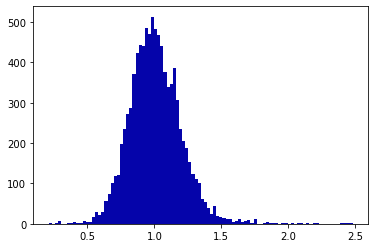

In [14]:
+temp_20=np.divide(np_valid_predEn[0],np_valid_trueEn[0])
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=temp_20,bins='auto', color='#0504aa')
                              #ha=0.7, rwidth=0.85)
#plt.plot(np_valid_predEn[0])
#fig, ax = plt.subplots(figsize=(20,10))
#fig.plot(np_valid_predEn[0])
#ax.plot(training_summary_v1['epoch'],training_summary_v1['valid_loss'], label='valid loss')
#ax.set_xlabel('Epochs')
#ax.set_ylabel('Loss')
#fig.legend(loc=(0.8,0.8))
#fig.show()
#fig.savefig("DRN_semi_dscb_bestArch_With-1MStats-25Epochs.png")

NameError: name 'plotHist' is not defined

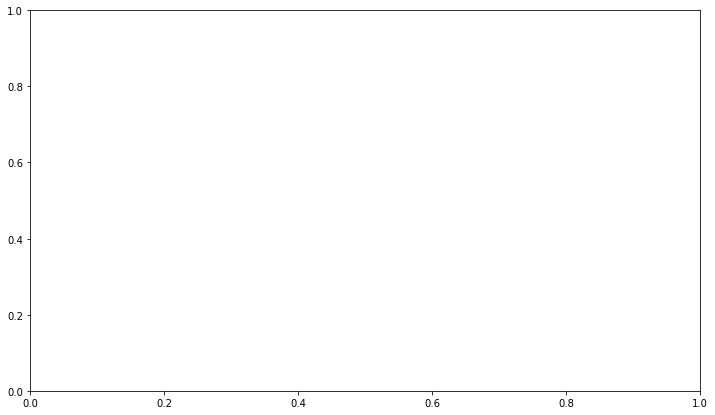

In [15]:
fig,axes = plt.subplots(figsize=(12, 7));
plotHist(axes,np_valid_predEn[0], "Pred Energy in GeV", "",\
         "", Nbins = 100, xlog=False, ylog=False)
fig.show()

In [ ]:
Training_File = "/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/Nosemi/model_checkpoint_DynamicReductionNetwork_264709_3b812971e1_asirohi.best.pth.tar"

In [10]:
tb_raw_up = np.load("/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_ratio_maxlr6e-4_lrSchCyclic_2agg_lay/rawE_up_TB_all_new.npy")
tb_raw = np.load("/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_ratio_maxlr6e-4_lrSchCyclic_2agg_lay/tb_rawE.npy")

In [11]:
tb_raw_up

array([ 13.76669768,  15.8403715 ,  10.78427691, ..., 310.88472182,
       250.84479367, 414.84940978])

In [13]:
tb_raw

array([ 12.59592832,  14.48698832,  10.28457937, ..., 286.43432553,
       235.02730372, 379.90389425])

In [24]:
tb_raw_up.size

533479

In [2]:
## reading tb data files
#tb_valid_idx_file="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/TB_data/all_valididx.pickle"
#tb_train_idx_file="/eos/user/k/kalpana/SWAN_projects/GNN_Results/FlatEnegrySample_1M/TB_data/all_trainidx.pickle"
tb_pred_v2 ="/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_ratio_maxlr6e-4_lrSchCyclic_2agg_lay/pred_up_old.pickle"


with open(tb_pred_v2, "rb") as f:
    preds_trueEn_tb = np.array(pickle.load(f))
preds_trueEn_tb = (preds_trueEn_tb<3)*preds_trueEn_tb + (preds_trueEn_tb>3)*3
#preds_trueEn_tb = np.load("/eos/user/n/nkasarag/gnn_results/cp_full_lr0001_Ratio_default_rechGeV_fix_wt_ahcalTrim/pred_cut_tb_upscaled.npy")

tb_raw = np.load("/eos/user/n/nkasarag/gnn_results/0to5M_fixwt_trimAhcal_relwtUpd_semiparam_ratio_maxlr6e-4_lrSchCyclic_2agg_lay/rawE_up_TB_all_new.npy")
#tb_predPickle = open(tb_pred_v2, "rb")
#print(tb_predPickle)
tb_preds_trueEn = preds_trueEn_tb*tb_raw

tb_trueEn= "/eos/user/n/nkasarag/gnn_results/cp_full_lr0006_lrShCyclic_Ratio_default_rechGeV_fix_wt_ahcalTrim_semiparam/cp5/trueE_tb.npy"
#tb_trueEnPickle = open(tb_trueEn,"rb")
tb_trueEn_pkl = np.load(tb_trueEn)
print(tb_trueEn_pkl[200000])

80.0


In [3]:
tb_trueEn_pkl==20

array([ True,  True,  True, ..., False, False, False])

In [4]:
a=tb_preds_trueEn[tb_trueEn_pkl==50]
a

array([57.32731417, 47.19198887, 56.60329104, ..., 50.42698955,
       57.91839242, 61.03084666])

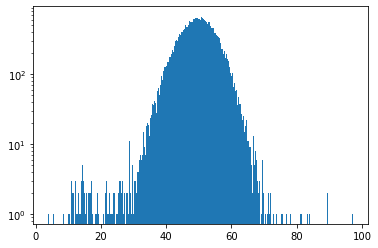

In [5]:
plt.hist(a,bins=500)
plt.yscale("log")